In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 103MB/s]


In [5]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 166 kB/s
     |████████████████████████████████| 102 kB 5.5 MB/s 
     |████████████████████████████████| 690 kB 4.2 MB/s 
     |████████████████████████████████| 4.7 MB 15.6 MB/s 
     |████████████████████████████████| 62 kB 61 kB/s 
     |████████████████████████████████| 9.8 MB 52.3 MB/s 
     |████████████████████████████████| 296 kB 48.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.0-py2.py3-none-any.whl size=268032 sha256=c694a4fa8619863b864e8399bdb5cc1f59fd9c63d97ad1ce2e19a4122e725785
  Stored in directory: /tmp/pip-ephem-wheel-cache-39_3of90/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c27e5d23863e8c816380fe40e1daa6a3c6bc83161c0bd3bf4ae3a4f6c8ad7ae7
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3

EDA

In [ ]:
!pip install pandas-profiling

In [7]:
import pandas as pd
from pandas_profiling import ProfileReport

In [23]:
df=pd.read_csv("train.csv")

In [9]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
profile=ProfileReport(df,title='Spaceship')

In [12]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

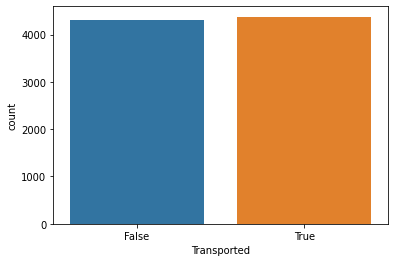

In [14]:
sns.countplot(x ='Transported', data = df)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [16]:
def split(x):
  if len(str(x))<4:
    return ['Missing','Missing','Missing']
  else:
    return str(x).split('/')

In [17]:
df['split_cabin']=df['Cabin'].apply(lambda x:split(x))

In [24]:
def preprocessing(df):
  #filling home planet
  df['HomePlanet'].fillna('Missing',inplace=True)
  #Filling Cryosleep
  df['CryoSleep'].fillna('Missing',inplace=True)
  #splitting cabin
  df['Deck']=df['Cabin'].apply(lambda x:split(x)[0])
  df['Side']=df['Cabin'].apply(lambda x:split(x)[2])
  df.drop('Cabin',inplace=True,axis=1)
  #Filling destination
  df['Destination'].fillna('Missing',inplace=True)
  #Filling age
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  #filling vip
  df['VIP'].fillna('Missing',inplace=True)
  #Fill monetary columns with 0
  df['RoomService'].fillna(0,inplace=True)
  df['FoodCourt'].fillna(0,inplace=True)
  df['ShoppingMall'].fillna(0,inplace=True)
  df['Spa'].fillna(0,inplace=True)
  df['VRDeck'].fillna(0,inplace=True)
  #dropping name(no use for prediction)
  df.drop('Name',inplace=True,axis=1)

In [25]:
abt=df.copy()
preprocessing(abt)
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [26]:
abt.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
#one hot encoding
x=abt.drop(['PassengerId','Transported'],axis=1)
x=pd.get_dummies(x)
y=abt['Transported']
x.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Missing', 'CryoSleep_False', 'CryoSleep_True',
       'CryoSleep_Missing', 'Destination_55 Cancri e', 'Destination_Missing',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'VIP_Missing', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Missing', 'Deck_T', 'Side_Missing',
       'Side_P', 'Side_S'],
      dtype='object')

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)


In [30]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [227]:
N,D=x_train.shape

32

In [224]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Input,Flatten,Dropout
from tensorflow.keras.models import Model

In [338]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(D,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [339]:
# # model using functional api
# # stride=2 reduces the pixel by half at each iteration
# i=Input((D,1,1))
# x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
# x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
# x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
# x=Flatten()(x)
# x.shape
# x=Dropout(0.2)(x)
# x=Dense(512,activation='relu')(x)
# x=Dropout(0.2)(x)
# x=Dense(k,activation='softmax')(x)

# model=Model(i,x)


In [340]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
191/191 [==============================] - 2s 5ms/step - loss: 0.5337 - accuracy: 0.7233 - val_loss: 0.4272 - val_accuracy: 0.7926
Epoch 2/25
191/191 [==============================] - 1s 5ms/step - loss: 0.4410 - accuracy: 0.7890 - val_loss: 0.4224 - val_accuracy: 0.7960
Epoch 3/25
191/191 [==============================] - 1s 5ms/step - loss: 0.4316 - accuracy: 0.7946 - val_loss: 0.4077 - val_accuracy: 0.7968
Epoch 4/25
191/191 [==============================] - 1s 5ms/step - loss: 0.4188 - accuracy: 0.8021 - val_loss: 0.4126 - val_accuracy: 0.7987
Epoch 5/25
191/191 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.7995 - val_loss: 0.4083 - val_accuracy: 0.8029
Epoch 6/25
191/191 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.8025 - val_loss: 0.4141 - val_accuracy: 0.8002
Epoch 7/25
191/191 [==============================] - 1s 4ms/step - loss: 0.4035 - accuracy: 0.8104 - val_loss: 0.4029 - val_accuracy: 0.8025
Epoch 

In [341]:
print('train score',model.evaluate(x_train,y_train))
print('test score',model.evaluate(x_test,y_test))

191/191 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8273
train score [0.3452124297618866, 0.8272802233695984]
82/82 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7995
test score [0.4296568036079407, 0.7994632124900818]


In [342]:
test=pd.read_csv('test.csv')

In [343]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [344]:
abt_test=test.copy()
preprocessing(abt_test)

In [345]:
abt_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S


In [346]:
abt_test=pd.get_dummies(abt_test.drop('PassengerId',axis=1))

In [347]:
len(abt_test.columns)

32

In [348]:
len(x.columns)

32

In [349]:
model.save('spaceship_titanic_tf')

In [350]:
model1=tf.keras.models.load_model('spaceship_titanic_tf')

In [351]:

y_hat=model.predict(abt_test).argmax(axis=1)
y_hat


array([0, 0, 1, ..., 0, 1, 0])

In [352]:
listt=[]
for i in y_hat:
  if i==1:
    listt.append("True")
  else:
    listt.append("False")

In [353]:
y_hat[:20]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [354]:
listt[:20]

['False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False']

In [355]:
submision=pd.DataFrame(test.PassengerId)

In [356]:
submision['Transported']=pd.DataFrame(listt)

In [357]:
submision

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,True
4274,9271_01,False
4275,9273_01,True


In [360]:
submision.to_csv('kaggle_submission.csv',index=False)

In [359]:
!kaggle competitions submit -c spaceship-titanic -f 'kaggle_submission.csv' -m "ANN model"

100% 57.5k/57.5k [00:03<00:00, 18.7kB/s]
400 - Bad Request
